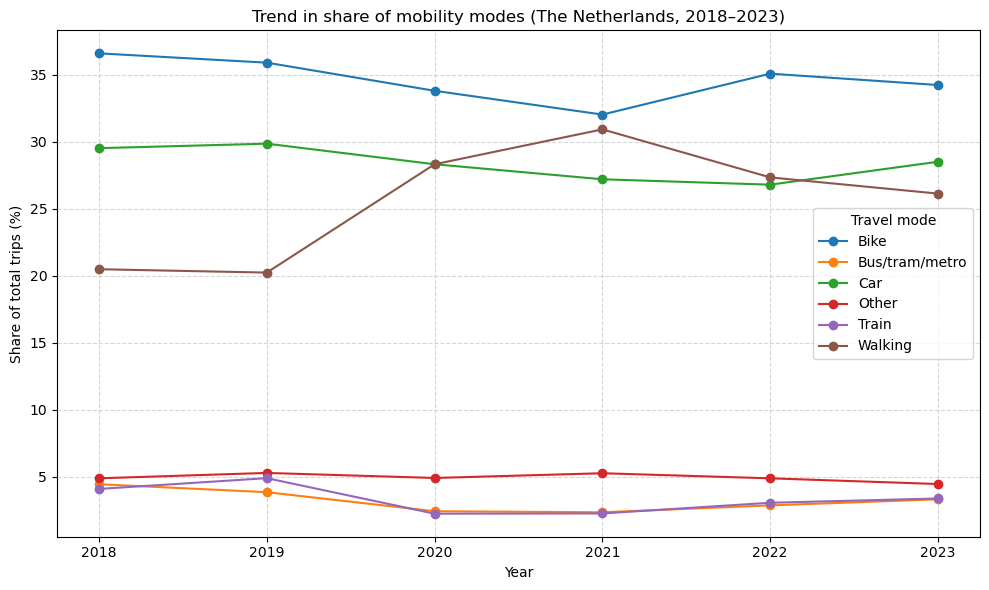

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Data inlezen ---
file_path = os.path.join("data", "clean_data.csv")
df = pd.read_csv(file_path)

# --- Data opschonen ---
# Alleen Nederland (geen provincies)
df = df[df["Regions"] == "The Netherlands"]

# Verwijder 'Total' rijen
df = df[df["Travel modes"] != "Total"]

# Combineer autorijder en autopassagier tot één categorie
df["Travel modes"] = df["Travel modes"].replace({
    "Passenger car (driver)": "Car",
    "Passenger car (passenger)": "Car"
})

# Filter gewenste jaren
df = df[df["Year"].between(2018.0, 2023.0)]

# --- Gemiddelde per jaar en vervoerswijze ---
gemiddelde = df.groupby(["Year", "Travel modes"])["Average number of trips per person per year"].mean().reset_index()

# --- Bereken aandeel (percentage) per jaar ---
totals = gemiddelde.groupby("Year")["Average number of trips per person per year"].sum().reset_index()
totals = totals.rename(columns={"Average number of trips per person per year": "totaltrips"})

gemiddelde = gemiddelde.merge(totals, on="Year", how="left")
gemiddelde["percentage"] = (gemiddelde["Average number of trips per person per year"] / gemiddelde["totaltrips"]) * 100

# --- Plot trend over de tijd ---
plt.figure(figsize=(10,6))

for mode in gemiddelde["Travel modes"].unique():
    subset = gemiddelde[gemiddelde["Travel modes"] == mode]
    plt.plot(subset["Year"], subset["percentage"], marker='o', label=mode)

plt.title("Trend in share of mobility modes (The Netherlands, 2018–2023)")
plt.xlabel("Year")
plt.ylabel("Share of total trips (%)")
plt.legend(title="Travel mode")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
